In [166]:
# importing required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [167]:
# importing the required library 
df = pd.read_csv(r"C:\Users\user\Desktop\IT vedant\ml project\1 campuse placement\data\collegePlace.csv")

In [168]:
# cheaking the frist five records from the data 
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [169]:
# age is not that much required so we wiil drop that 
df.drop("Age" , axis= 1 , inplace=True)


In [170]:
df.drop("Gender" , axis= 1 , inplace=True)

In [171]:
df.drop("Hostel" , axis= 1 , inplace=True)

In [172]:
# cheaking the shaoe of the data 
df.shape

(2966, 5)

In [173]:
# cheaking the null values from the data 
df.isnull().sum()

Stream               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [174]:
# cheaking the duplicate values 
df.duplicated().sum()

2727

In [175]:
# df  = df.reset_index()
# done this step but there is no need of this because duplicated values only hold 2 categoris 

> ## divide the data into categorical col and numerical col 

In [176]:
num_col = df.select_dtypes("int64")
cat_col = df.select_dtypes("object")

In [177]:
# all numerical colmens 
num_col.columns

Index(['Internships', 'CGPA', 'HistoryOfBacklogs', 'PlacedOrNot'], dtype='object')

In [178]:
# all the categorical col 
cat_col.columns

Index(['Stream'], dtype='object')

> # visulization on the numerical col 

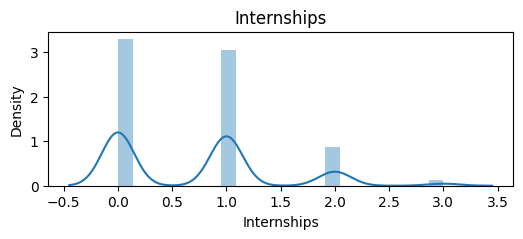

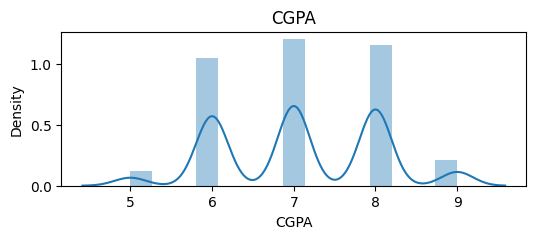

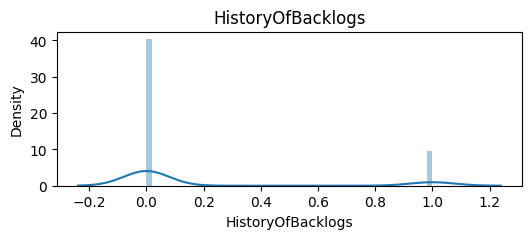

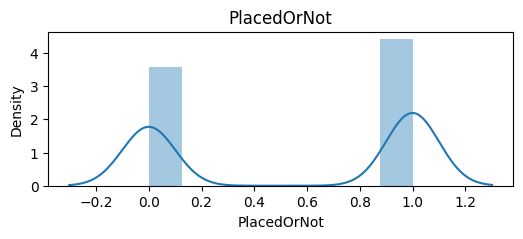

In [179]:
for i in num_col.columns :
    plt.figure(figsize=(6,2))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

for i in num_col.columns :
    print(i)
    print(df[i].skew())

># why change is not happing  ? 

for i in num_col.columns :
    if df[i].skew() > 0.5 :
        df[i] = np.sqrt(df[i])

for i in num_col.columns :
    print(i)
    print(df[i].skew())

> # visulization for the categorical col 

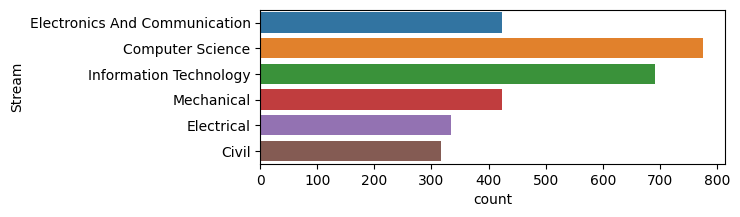

In [180]:
for i in cat_col.columns :
    plt.figure(figsize=(6,2))
    sns.countplot(data= df ,y=i)
    plt.show()

In [181]:
# males presence in the data set in higher than the females 
# computer science is the most favorite stream in engineering 


In [182]:
# cheaking diffenrt values present in the catgorical col 
for i in cat_col.columns :
    print(f"{i} ====> \n{df[i].value_counts()}")
    print("--------------------------------------")

Stream ====> 
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64
--------------------------------------


> ### converting the categorical values into numerical values 

In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [184]:
print(df["Stream"].unique())
df['Stream'] = le.fit_transform(df['Stream'])
print(df['Stream'].unique())

['Electronics And Communication' 'Computer Science'
 'Information Technology' 'Mechanical' 'Electrical' 'Civil']
[3 1 4 5 2 0]


In [185]:
# all the data is in the from of number now 
df.head()

,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,3,1,8,1,1
1,1,0,7,1,1
2,4,1,6,0,1
3,4,0,8,1,1
4,5,0,8,0,1


> all the data is in the form of numbers now 

> ##  dividing the data into dependant and independant 

In [186]:
x = df.drop('PlacedOrNot' ,axis=1)
y = df['PlacedOrNot']

In [187]:
# no need of smapling ( because the target variable does not have that much diffenece )
y.value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Stream             2966 non-null   int32
 1   Internships        2966 non-null   int64
 2   CGPA               2966 non-null   int64
 3   HistoryOfBacklogs  2966 non-null   int64
 4   PlacedOrNot        2966 non-null   int64
dtypes: int32(1), int64(4)
memory usage: 104.4 KB


In [189]:
df['Stream'] = df['Stream'].astype("int64")

> # dividng the data into traning and testing part 

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [192]:
X_train.head()

,Stream,Internships,CGPA,HistoryOfBacklogs
2458,5,1,8,0
509,4,0,7,0
1370,4,0,7,1
1352,1,1,7,0
1779,2,1,8,0


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> # model building 

In [193]:
# importing required models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

In [194]:
# making the object for every model and fiting the data into it 
lr = LogisticRegression()
lr.fit(X_train,y_train)

s = svm.SVC()
s.fit(X_train,y_train)

kd=KNeighborsClassifier()
kd.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [195]:
y_pred_lr= lr.predict(X_test)
y_pred_kd= kd.predict(X_test)
y_pred_s= s.predict(X_test)
y_pred_dt= dt.predict(X_test)
y_pred_rf= rf.predict(X_test)
y_pred_gb= gb.predict(X_test)

> # Accuracy score for every model 

In [196]:
from sklearn.metrics import accuracy_score

In [197]:
score_lr = accuracy_score(y_test ,y_pred_lr)
score_kd = accuracy_score(y_test ,y_pred_kd)
score_s = accuracy_score(y_test ,y_pred_s)
score_dt = accuracy_score(y_test ,y_pred_dt)
score_rf = accuracy_score(y_test ,y_pred_rf)
score_gb = accuracy_score(y_test ,y_pred_gb)

In [198]:
print("score for the logistc regression = " ,score_lr)
print("score for the decision tree =" ,score_dt)
print("score for the KNeighborsClassifier =" ,score_kd)
print("score for the support vector machine  =" ,score_s)
print("score for the GradientBoostingClassifier =" ,score_gb)
print("score for the random forest =" ,score_rf)

score for the logistc regression =  0.734006734006734
score for the decision tree = 0.8417508417508418
score for the KNeighborsClassifier = 0.8333333333333334
score for the support vector machine  = 0.835016835016835
score for the GradientBoostingClassifier = 0.8417508417508418
score for the random forest = 0.8451178451178452


In [199]:
 #converting the score and name into a dictonary 
di1= ({"models" : ["LR","SVM","KNN","DT","RF", "GB"],
       "Accuracy" : [score_lr*100 ,
                     score_s*100 ,
                     score_kd *100 ,
                     score_dt *100 ,
                     score_rf *100 ,
                     score_gb * 100]})

In [200]:
final_1 =pd.DataFrame(di1)

In [201]:
final_1

,models,Accuracy
0,LR,73.400673
1,SVM,83.501684
2,KNN,83.333333
3,DT,84.175084
4,RF,84.511785
5,GB,84.175084


<Axes: xlabel='models', ylabel='Accuracy'>

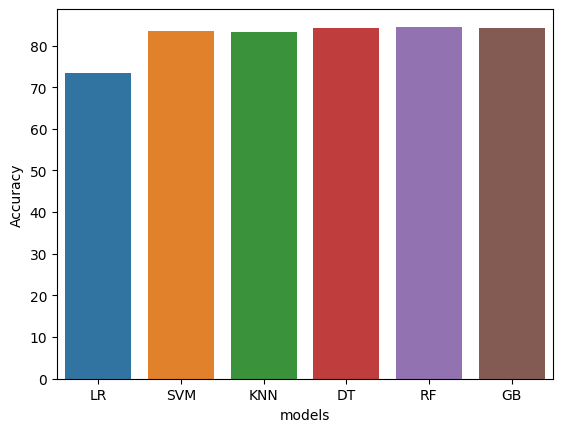

In [202]:
sns.barplot(x='models', y='Accuracy' ,data=final_1)

> # using diffenet parameters 

In [203]:
s = svm.SVC(kernel = 'linear' ,gamma = 'scale')
s.fit(X_train,y_train)
kd=KNeighborsClassifier(n_neighbors = 6)
kd.fit(X_train,y_train)

dt=DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,y_train)

rf=RandomForestClassifier(n_estimators = 50 ,max_depth = 6)
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier(learning_rate = 0.2)
gb.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.2)

In [204]:
y_pred_lr= lr.predict(X_test)
y_pred_kd= kd.predict(X_test)
y_pred_s= s.predict(X_test)
y_pred_dt= dt.predict(X_test)
y_pred_rf= rf.predict(X_test)
y_pred_gb= gb.predict(X_test)

In [205]:
score_lr = accuracy_score(y_test ,y_pred_lr)
score_kd = accuracy_score(y_test ,y_pred_kd)
score_s = accuracy_score(y_test ,y_pred_s)
score_dt = accuracy_score(y_test ,y_pred_dt)
score_rf = accuracy_score(y_test ,y_pred_rf)
score_gb = accuracy_score(y_test ,y_pred_gb)

In [206]:
print("score for the logistc regression = " ,score_lr)
print("score for the decision tree =" ,score_dt)
print("score for the KNeighborsClassifier =" ,score_kd)
print("score for the support vector machine  =" ,score_s)
print("score for the GradientBoostingClassifier =" ,score_gb)
print("score for the random forest =" ,score_rf)

score for the logistc regression =  0.734006734006734
score for the decision tree = 0.8434343434343434
score for the KNeighborsClassifier = 0.8367003367003367
score for the support vector machine  = 0.734006734006734
score for the GradientBoostingClassifier = 0.8434343434343434
score for the random forest = 0.8434343434343434


In [207]:
 #converting the score and name into a dictonary 
di2= ({"models" : ["LR","SVM","KNN","DT","RF", "GB"],
       "Accuracy" : [score_lr*100 ,
                     score_s*100 ,
                     score_kd *100 ,
                     score_dt *100 ,
                     score_rf *100 ,
                     score_gb * 100]})

In [208]:
final_2 =pd.DataFrame(di1)

In [209]:
final_2

,models,Accuracy
0,LR,73.400673
1,SVM,83.501684
2,KNN,83.333333
3,DT,84.175084
4,RF,84.511785
5,GB,84.175084


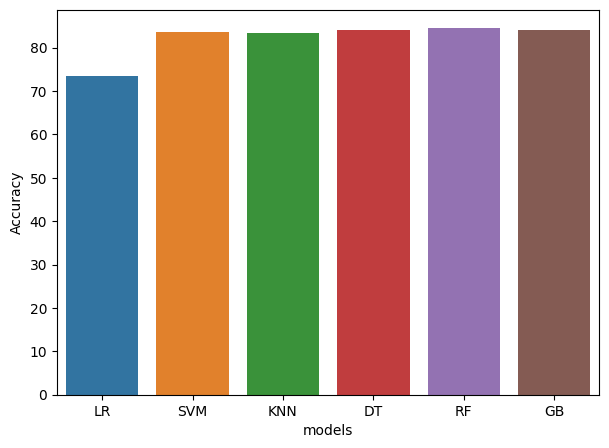

In [210]:
plt.figure(figsize=(7,5))
sns.barplot(x='models', y='Accuracy' ,data=final_2)
plt.show()

> # Decision Tree  is used because its accuracy is very high 

> # testing on the unseen data 

> positive data 

In [211]:
positive_data = {
    'Stream': 1,  # Assuming numerical codes for streams
    'Internships' : 3,  # Number of internships
    'CGPA':  8,  # CGPA
    'HistoryOfBacklogs':  1  # Number of backlogs
}


In [212]:
data = pd.DataFrame(positive_data ,index=["all data"])

In [213]:
p=lr.predict(data)
prob=lr.predict_proba(data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.98


> negative data 

In [214]:
negative_data = {
    'Stream': 1,  # Assuming numerical codes for streams
    'Internships' : 0,  # Number of internships
    'CGPA':  0,  # CGPA
    'HistoryOfBacklogs':  0  # Number of backlogs
}


In [215]:
data2 = pd.DataFrame(negative_data  ,index=["all data"])

In [216]:
p=lr.predict(data2)
prob=lr.predict_proba(data2)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Not-placed


> # saving the logistic regression into a file 

In [217]:
import pickle 
with open ('engi.pkl' ,'wb') as file :
    pickle.dump(dt,file)

In [218]:
x.columns

Index(['Stream', 'Internships', 'CGPA', 'HistoryOfBacklogs'], dtype='object')